In [37]:
import pandas as pd
import folium
import seaborn as sns


In [2]:
data = pd.read_csv('Datasets/number-with-mental-and-neurodevelopmental-disorders-by-type.csv')
#data_2016=
data_2016=data[data['Year']==2016]
country_codes = pd.read_csv('Datasets/Country_codes.csv',encoding='cp1252')
codes= list(country_codes['A 3'])
Africa_2016 = data_2016[data_2016['Code'].isin(codes)]
Africa_2016.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number),Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number),Prevalence - Bipolar disorder - Sex: Both - Age: All Ages (Number),Prevalence - Eating disorders - Sex: Both - Age: All Ages (Number),Prevalence - Schizophrenia - Sex: Both - Age: All Ages (Number),Prevalence - Attention-deficit/hyperactivity disorder - Sex: Both - Age: All Ages (Number),Prevalence - Conduct disorder - Sex: Both - Age: All Ages (Number),Prevalence - Other mental and substance use disorders - Sex: Both - Age: All Ages (Number),Prevalence - Idiopathic developmental intellectual disability - Sex: Both - Age: All Ages (Number),Prevalence - Autistic spectrum disorders - Sex: Both - Age: All Ages (Number)
82,Algeria,DZA,2016,1.375799e+06,1.938759e+06,315487.614024,88643.818622,77846.626302,447075.016401,288303.998595,773588.815241,497072.856318,133540.216813
194,Angola,AGO,2016,8.005178e+05,7.623102e+05,133635.678182,42996.692323,31877.314058,417037.086856,288624.009738,352999.789142,96113.808576,123090.415783
614,Benin,BEN,2016,2.802619e+05,2.903405e+05,58686.463278,13015.660715,13208.284876,177393.719296,122400.307951,149880.552288,74373.043066,50958.292568
754,Botswana,BWA,2016,7.833269e+04,7.587363e+04,13799.197133,5653.762833,3762.691936,33070.732488,19347.763866,40050.389565,6059.289707,9901.701353
866,Burkina Faso,BFA,2016,5.145985e+05,5.211490e+05,102572.169669,21640.608678,23198.607072,316447.096809,219507.505330,268242.066667,156901.396919,92227.721979


In [52]:
country_codes

,Country,A 3,Region
0,ALGERIA,DZA,AFRINIC
1,ANGOLA,AGO,AFRINIC
2,BENIN,BEN,AFRINIC
3,BOTSWANA,BWA,AFRINIC
4,BURKINA FASO,BFA,AFRINIC
5,BURUNDI,BDI,AFRINIC
6,CAMEROON,CMR,AFRINIC
7,CAPE VERDE,CPV,AFRINIC
8,CENTRAL AFRICAN REPUBLIC,CAF,AFRINIC
9,CHAD,TCD,AFRINIC


In [34]:
africa_map = "Datasets/africa_map.txt"



m = folium.Map(location=[-1.289772712474131, 36.78426333871622], zoom_start=3)

folium.Choropleth(
    geo_data=africa_map,
    name="choropleth",
    data=Africa_2016,
    columns=["Entity", "Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Drug use in african countries",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [42]:
deaths = pd.read_csv('Datasets/Clean_Drugs.csv')
#Change the data to get total deaths by all drugs for the year 2016
Deaths_2016 = deaths[deaths['Year']==2016].drop(columns=(['Unnamed: 0','Code','Year'])).set_index('Entity')
Deaths_2016['Total_deaths'] = deaths['Death_Cocaine']# + deaths['Death_illicit_drugs']
Deaths_2016

,Death_Cocaine,Death_illicit_drugs,Death_Opioid,Death_Alchohol,Death_other_drugs,Death_Amphetamine,Total_deaths
Entity,,,,,,,
Algeria,20.657250,977.583040,816.891879,127.157252,129.499185,10.534726,NaN
Angola,12.494723,157.570883,78.842078,237.377799,59.315454,6.918628,NaN
Benin,3.538084,93.020194,60.336650,125.129357,27.296396,1.849063,NaN
Botswana,0.562127,25.329760,19.941195,25.132925,4.570311,0.256128,NaN
Burkina Faso,6.499120,129.999687,75.561422,252.942927,43.958639,3.980507,NaN
Burundi,2.583630,27.022297,9.920654,106.559745,12.580305,1.937707,NaN
Cameroon,22.000809,519.891834,374.088129,344.466001,115.091120,8.711777,NaN
Cape Verde,0.511492,16.757257,11.001535,8.630428,5.036989,0.207240,NaN
Central African Republic,2.384336,38.574869,19.798485,63.999387,14.681337,1.710711,NaN


## Exploratory data analysis

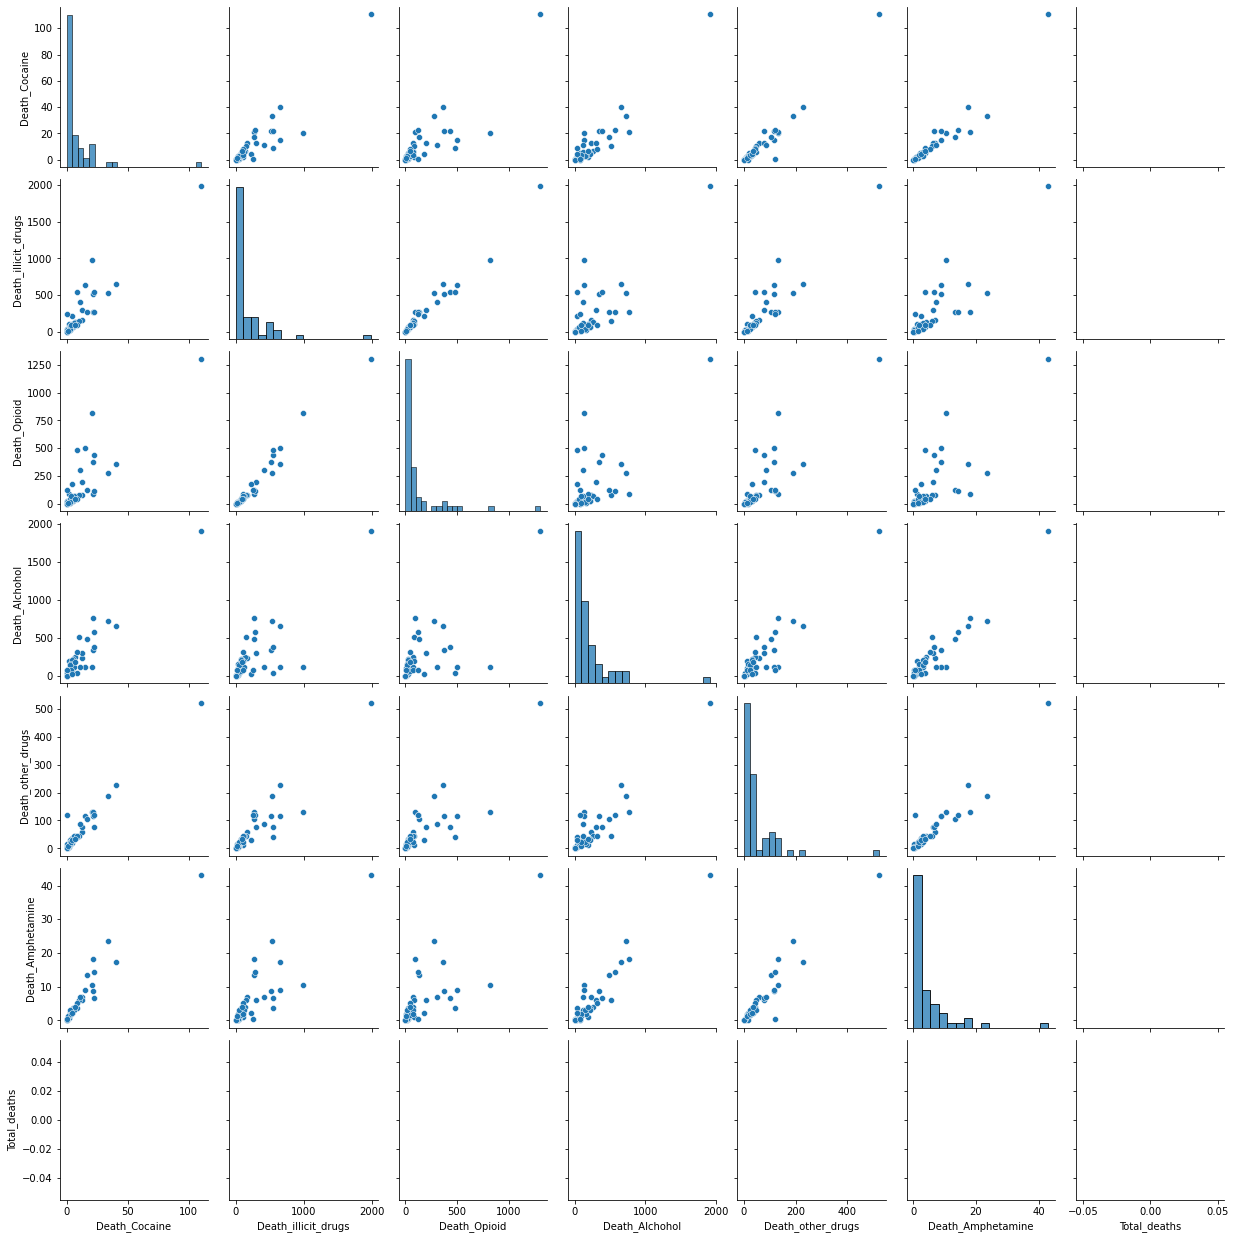

In [38]:
# summaries 
sns.pairplot(Deaths_2016)

<AxesSubplot:>

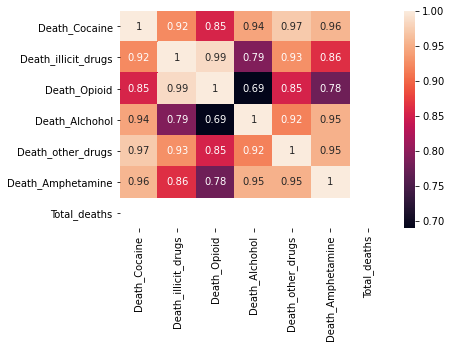

In [43]:
sns.heatmap(Deaths_2016.corr(), annot=True)

In [50]:
folium.Map(location=[-1.289772712474131, 36.78426333871622], zoom_start=3)